# SPAM MESSAGES – MACHINE LEARNING

Installations

In [30]:
!jt -t monokai

In [ ]:
!git add "Spam ML".ipynb

In [24]:
#Imports 
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import copy
from collections import Counter 
%matplotlib inline

# COUNT VALID WORDS

READ IN DATA

In [7]:
df = pd.read_csv("spam.csv", encoding='cp1252')
print("Number of Observations: ", len(df))
print("Number of Columns: ", len(df.columns))
df.head()

Number of Observations:  5572
Number of Columns:  5


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


CLEANING THE DATA

In [9]:
spam_df = df[["v1", "v2"]]
print("Number of Observations: ", len(df))
print("Number of Columns: ", len(spam_df.columns))
spam_df["Spam?"] = np.where(spam_df["v1"] == "spam", 1, 0)
spam_df = spam_df[["Spam?", "v2"]]
spam_df.rename(columns = {"v2": "Message"}, inplace=True)
spam_df.head()

Number of Observations:  5572
Number of Columns:  2


/var/folders/t9/jkdln0dj4z1d48j56btqnp780000gn/T/ipykernel_3228/3345441496.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spam_df["Spam?"] = np.where(spam_df["v1"] == "spam", 1, 0)


,Spam?,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


ADDING VARIABLES

Most Frequent Words in Spam / Ham

In [515]:
# Spam Most Common Words
spam_only = spam_df[spam_df["Spam?"] == 1]
spam_words = ""
for message in spam_only["Message"]:
    spam_words = spam_words.lower() + " " + message
spam_word_array = spam_words.split(" ")
spam_most_common = Counter(spam_word_array).most_common(30)
spam_words_df = pd.DataFrame(spam_most_common, columns = ["Word", "Count"])
  
# Ham Most Common Words 
ham_only = spam_df[spam_df["Spam?"] == 0]
ham_words = ""
for message in ham_only["Message"]:
    ham_words = ham_words.lower() + " " + message
ham_word_array = ham_words.split(" ")
ham_most_common = Counter(ham_word_array).most_common(30)
ham_words_df = pd.DataFrame(ham_most_common, columns = ["Word", "Count"])

Graph Thirty Most Frequent Words in Spam Messages

<AxesSubplot:xlabel='Count', ylabel='Word'>

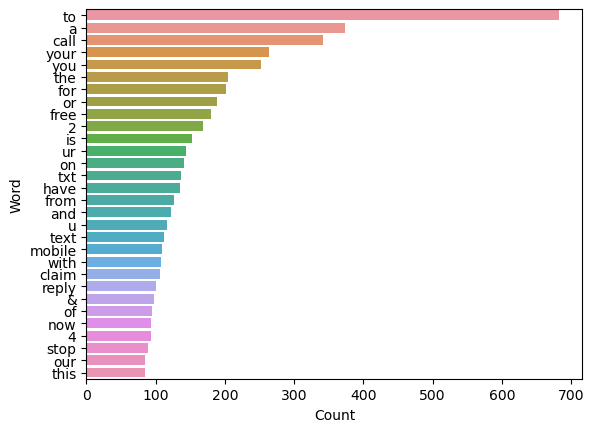

In [516]:
sns.barplot(data=spam_words_df, x="Count", y="Word")

Graph Thirty Most Frequent Words in Ham Messages

<AxesSubplot:xlabel='Count', ylabel='Word'>

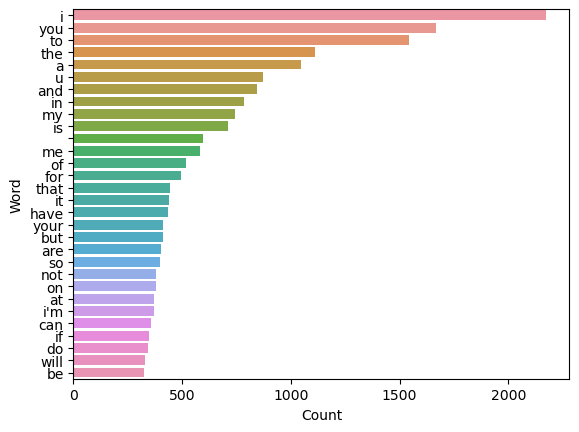

In [517]:
sns.barplot(data=ham_words_df, x="Count", y="Word")

Adding Variables

In [593]:
spam_df["num_phone_related"] = spam_df["Message"].str.lower().str.count("msg|sms|message|mobile|phone|call|txt|text|texting|send") 
spam_df["num_winner"] = spam_df["Message"].str.lower().str.count("winner|congratulations|prize|jackpot|claim|vacation|cash|free|won|win|winning|iphone|money|ipad|cash") 
spam_df["greetings"] = spam_df["Message"].str.lower().str.count("hello|hi|what's up|whats up|sup|hey|heyy|heyyy")
spam_df["num_of_website"] = spam_df["Message"].str.lower().str.count("http|www|.com|.net|website|link") 
spam_df["num_rand_letters"] = spam_df["Message"].str.count("!|@|#|$|%|^|&|>|<|/+|=") - 2
spam_df["num_money"] = spam_df["Message"].str.lower().str.count("$|money|cash|card|free|credit|pay|venmo|cashapp|dollars|credits|dollar|cards") - 1
spam_df["length_of_mess"] = [len(mess) for mess in spam_df["Message"]]
spam_df["spam_word_count"] = spam_df["Message"].str.count("to|a|call|your|you|the|for|or|free|2|is|ur|on|txt|have|from|and|u|text|mobile|with|claim|reply|&|of|now|4|stop|our|this")
spam_df["ham_word_count"] = spam_df["Message"].str.count("i|you|to|the|a|u|and|in|my|is|me|of|for|that|it|have|your|but|are|so|not|on|at|i'm|can|if|do|will|be")
spam_df[:20]




,Spam?,Message,num_phone_related,num_winner,greetings,num_of_website,num_rand_letters,length_of_mess,spam_word_count,ham_word_count,Variable,num_money
0,0,"Go until jurong point, crazy.. Available only ...",0,0,0,0,0,111,17,20,Ham,0
1,0,Ok lar... Joking wif u oni...,0,0,0,0,0,29,3,6,Ham,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,2,2,0,1,1,155,19,16,Spam,1
3,0,U dun say so early hor... U c already then say...,0,0,0,0,0,49,8,8,Ham,0
4,0,"Nah I don't think he goes to usf, he lives aro...",0,0,1,0,0,61,7,9,Ham,0
5,1,FreeMsg Hey there darling it's been 3 week's n...,2,1,1,0,2,148,12,18,Spam,1
6,0,Even my brother is not like to speak with me. ...,0,0,1,0,0,77,8,15,Ham,0
7,0,As per your request 'Melle Melle (Oru Minnamin...,3,0,0,0,0,160,21,26,Ham,0
8,1,WINNER!! As a valued network customer you have...,1,4,0,1,3,158,20,23,Spam,0
9,1,Had your mobile 11 months or more? U R entitle...,4,2,0,0,1,154,21,21,Spam,2


# Demonstrating Data

Length of Message with Outliers

<AxesSubplot:title={'center':'Mean Length of Message for Spam and Ham'}, xlabel='Spam', ylabel='Mean Length of Message'>

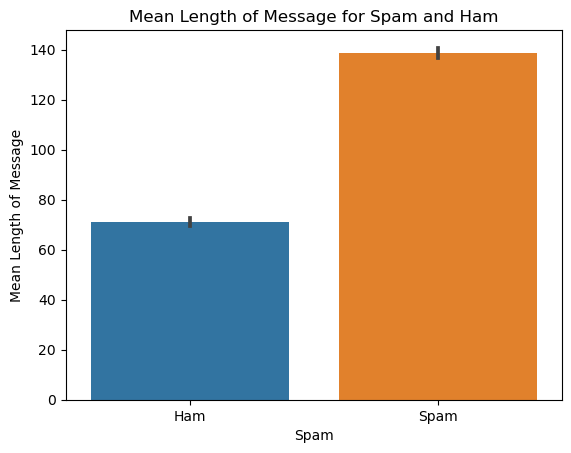

In [575]:
# Mean Length of Message for Spam and Ham 

plot_one_data = spam_df
plot_one_data["Variable"] = np.where(plot_one_data["Spam?"] ==1, "Spam", "Ham")
plot_one = sns.barplot(data=plot_one_data, y="length_of_mess", x="Variable")
plot_one.set(xlabel="Spam", ylabel="Mean Length of Message", title="Mean Length of Message for Spam and Ham")
plot_one

Number of Messages Talking About Winner vs. Number of Messages with Random Characters – Boxplot & Scatterplot

<AxesSubplot:title={'center':'Mean Number of Random Characters for Spam and Ham'}, xlabel='Spam', ylabel='Mean Length of Message'>

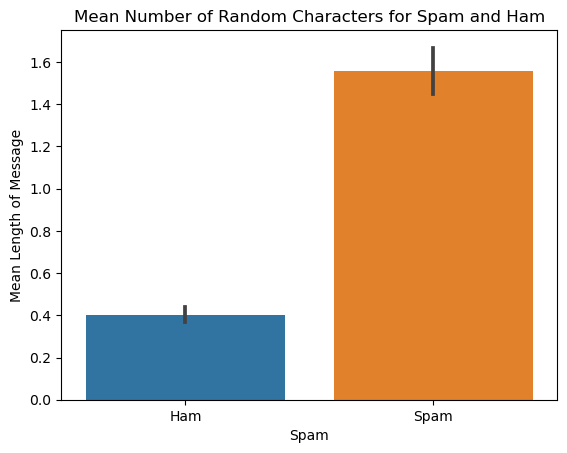

In [576]:
# Mean Number of Random Characters for Spam and Ham 

plot_two_data = spam_df
plot_two_data["Variable"] = np.where(plot_two_data["Spam?"] ==1, "Spam", "Ham")
plot_two = sns.barplot(data=plot_two_data, y="num_rand_letters", x="Variable")
plot_two.set(xlabel="Spam", ylabel="Mean Length of Message", title="Mean Number of Random Characters for Spam and Ham")
plot_two

<AxesSubplot:title={'center':'Mean Number of Winning References for Spam and Ham'}, xlabel='Spam', ylabel='Mean Number of Winning References'>

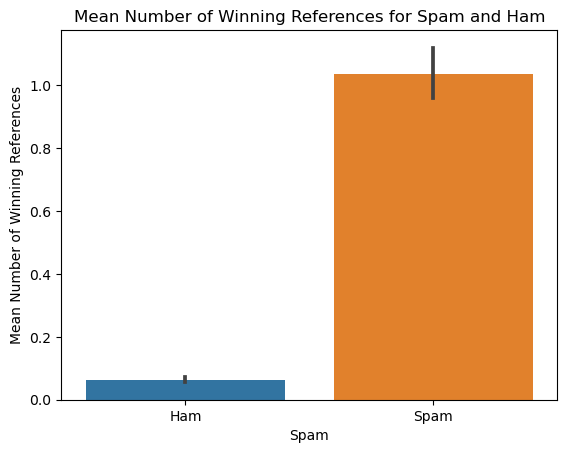

In [577]:
# Mean Number of Winning References for Spam and Ham 

plot_three_data = spam_df
plot_three_data["Variable"] = np.where(plot_one_data["Spam?"] ==1, "Spam", "Ham")
plot_three = sns.barplot(data=plot_three_data, y="num_winner", x="Variable")
plot_three.set(xlabel="Spam", ylabel="Mean Number of Winning References", title="Mean Number of Winning References for Spam and Ham")
plot_three

<AxesSubplot:title={'center':'Mean Number of Website References for Spam and Ham'}, xlabel='Spam', ylabel='Mean Number of Website References'>

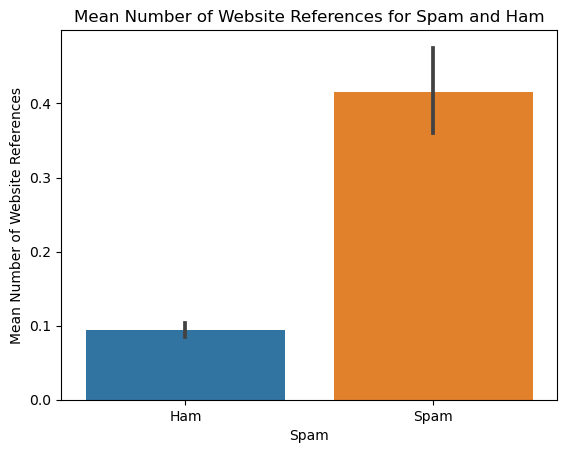

In [578]:
# Mean Number of Website References for Spam and Ham

plot_four_data = spam_df
plot_four_data["Variable"] = np.where(plot_four_data["Spam?"] ==1, "Spam", "Ham")
plot_four = sns.barplot(data=plot_four_data, y="num_of_website", x="Variable")
plot_four.set(xlabel="Spam", ylabel="Mean Number of Website References", title="Mean Number of Website References for Spam and Ham")
plot_four

<AxesSubplot:title={'center':'Mean Number of Phone References for Spam and Ham'}, xlabel='Spam', ylabel='Mean Number of Phone References'>

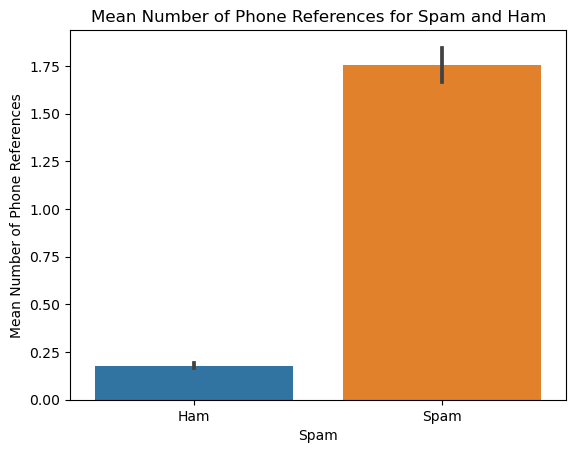

In [579]:
# Mean Number of Phone References for Spam and Ham

plot_five_data = spam_df
plot_five_data["Variable"] = np.where(plot_five_data["Spam?"] ==1, "Spam", "Ham")
plot_five = sns.barplot(data=plot_five_data, y="num_phone_related", x="Variable")
plot_five.set(xlabel="Spam", ylabel="Mean Number of Phone References", title="Mean Number of Phone References for Spam and Ham")
plot_five

<AxesSubplot:title={'center':'Mean Number of Money References for Spam and Ham'}, xlabel='Spam', ylabel='Mean Number of Money References'>

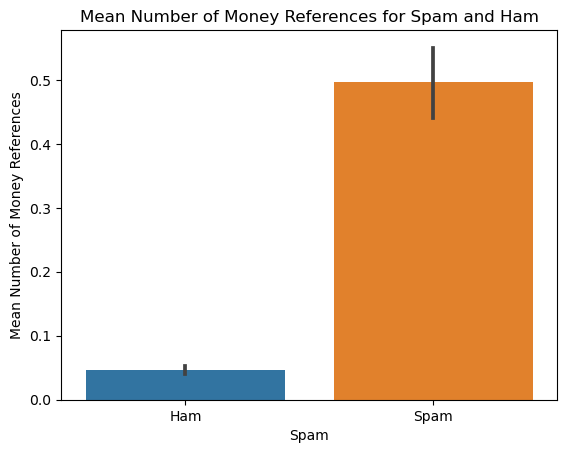

In [594]:
# Mean Number of Money References for Spam and Ham 

plot_six_data = spam_df
plot_six_data["Variable"] = np.where(plot_six_data["Spam?"] ==1, "Spam", "Ham")
plot_six = sns.barplot(data=plot_six_data, y="num_money", x="Variable")
plot_six.set(xlabel="Spam", ylabel="Mean Number of Money References", title="Mean Number of Money References for Spam and Ham")
plot_six

<AxesSubplot:title={'center':'Mean Number of Greetings for Spam and Ham'}, xlabel='Spam', ylabel='Mean Number of Greetings'>

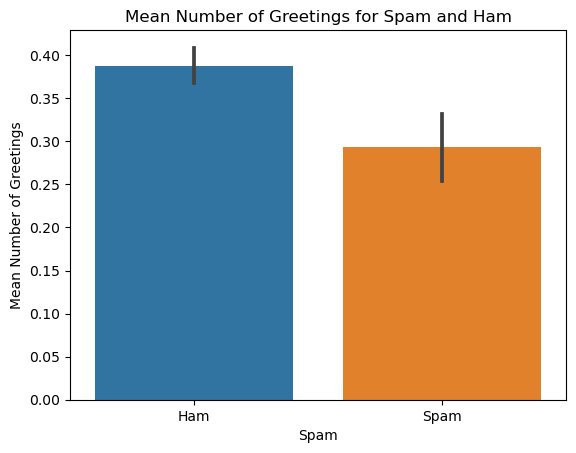

In [595]:
# Mean Number of Greetings for Spam and Ham 

plot_seven_data = spam_df
plot_seven_data["Variable"] = np.where(plot_seven_data["Spam?"] ==1, "Spam", "Ham")
plot_seven = sns.barplot(data=plot_seven_data, y="greetings", x="Variable")
plot_seven.set(xlabel="Spam", ylabel="Mean Number of Greetings", title="Mean Number of Greetings for Spam and Ham")
plot_seven

Spam Word vs Ham Word Counts

<AxesSubplot:title={'center':'Number of Spam Words vs. Number of Ham Words for Spam and Ham Messages'}, xlabel='Number of Spam Words', ylabel='Number of Ham Words'>

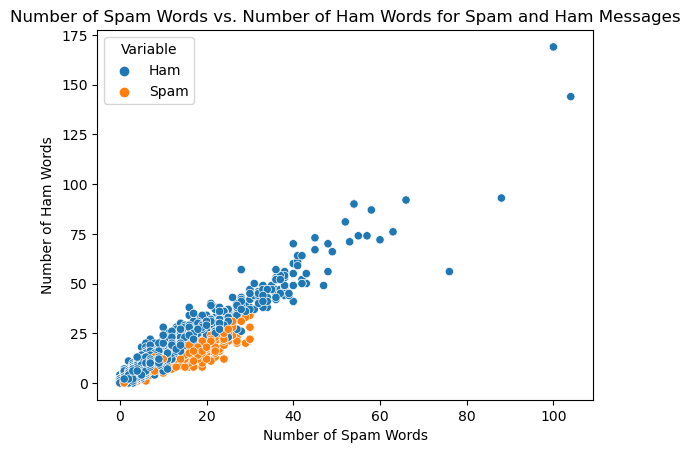

In [596]:
# Number of Spam Words vs. Number of Ham Words for Spam and Ham Messages

plot_eight_data = spam_df
plot_eight_data["Variable"] = np.where(plot_eight_data["Spam?"] ==1, "Spam", "Ham")
plot_eight = sns.scatterplot(data=plot_eight_data, y="ham_word_count", x="spam_word_count", hue = "Variable")
plot_eight.set(xlabel="Number of Spam Words", ylabel="Number of Ham Words", title="Number of Spam Words vs. Number of Ham Words for Spam and Ham Messages")
plot_eight

Prepping Data for Logistic Regression & MultinomialNB

In [584]:
import sklearn
from sklearn.linear_model import LogisticRegression 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics 
from sklearn.model_selection import train_test_split

spam_data = spam_df.drop(columns=["Spam?", "Message", "Variable"])
spam_target = spam_df["Spam?"]
X_train, X_test, y_train_target, y_test_target = train_test_split(spam_data, spam_target, test_size = 0.3, random_state=999)
X_train.head()

,num_phone_related,num_winner,greetings,num_of_website,num_rand_letters,length_of_mess,spam_word_count,ham_word_count,num_money
4624,0,0,0,0,0,24,4,4,1
3815,0,0,0,0,0,32,3,6,1
3252,0,0,0,0,0,35,2,4,1
1348,0,0,3,0,0,51,4,8,1
3651,0,0,0,0,0,46,2,7,1


The First Twenty Predictions are:  [0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0]
The Accuracy Score for the Logistic Regression is:  0.9503588516746412
The Confusion Matrix for the Logistic Regression is: 


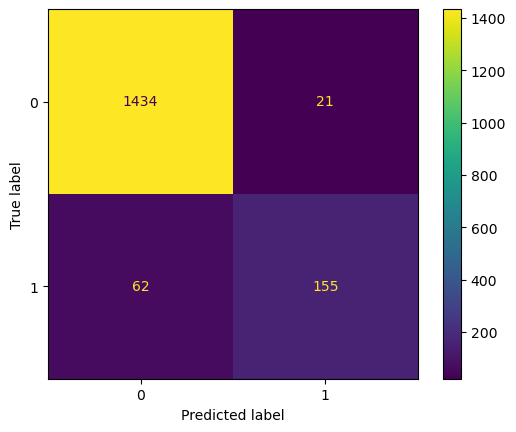

In [585]:
# Trial One: Logistic Regression using Scikit-Learn

num_log = X_train.values
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X=num_log, y=y_train_target)

num_log1 = X_test.values
log_predicted = log_model.predict(num_log1)

ConfusionMatrixDisplay.from_estimator(estimator=log_model, X=num_log1, y=y_test_target)
plt.grid(False)

score = accuracy_score(y_true = y_test_target, y_pred=log_predicted)
print("The First Twenty Predictions are: ", log_predicted[:20])
print("The Accuracy Score for the Logistic Regression is: ", score)
print("The Confusion Matrix for the Logistic Regression is: ")

Running MultinomialNB

In [586]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix

# MultinomialNB

mnb = MultinomialNB()
mnb.fit(X_train, y_train_target)
y_pred = mnb.predict(X_test)

print("The First Twenty Predictions are: ", y_pred[:20])
print("The Accuracy Score for the BernoulliNB is: ", accuracy_score(y_test_target, y_pred))
print("The Confusion Matrix for the BernoulliNB is: \n", confusion_matrix(y_test_target,y_pred))

The First Twenty Predictions are:  [0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0]
The Accuracy Score for the BernoulliNB is:  0.937200956937799
The Confusion Matrix for the BernoulliNB is: 
 [[1410   45]
 [  60  157]]


Creating the Bernoulli DataFrame

In [588]:
# Creating the Boolean Dataframe for BernoulliNB
bernoulli_df = pd.DataFrame({})
bernoulli_df["Spam?"] = spam_df["Spam?"]
bernoulli_df["Message"] = spam_df["Message"]
bernoulli_df["Phone_Related"] = np.where(spam_df["num_phone_related"] > 0, True, False)
bernoulli_df["Winner_Related"] = np.where(spam_df["num_winner"] > 0, True, False)
bernoulli_df["Website_Related"] = np.where(spam_df["num_of_website"] > 0, True, False)
bernoulli_df["Random_Letters"] = np.where(spam_df["num_rand_letters"] > 0, True, False)
bernoulli_df["Greetings"] = np.where(spam_df["greetings"] > 0, True, False)
bernoulli_df["Money_Related"] = np.where(spam_df["num_money"] > 0, True, False)

bernoulli_data = bernoulli_df.drop(columns=["Spam?", "Message"])
bernoulli_target = bernoulli_df["Spam?"]
X_train_bnb, X_test_bnb, y_train_target_bnb, y_test_target_bnb = train_test_split(bernoulli_data, bernoulli_target, test_size = 0.3, random_state=999)
X_train_bnb.head()

,Phone_Related,Winner_Related,Website_Related,Random_Letters,Greetings,Money_Related
4624,False,False,False,False,False,True
3815,False,False,False,False,False,True
3252,False,False,False,False,False,True
1348,False,False,False,False,True,True
3651,False,False,False,False,False,True


Running BernoulliNB

In [589]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix

bnb = BernoulliNB()
bnb.fit(X_train_bnb, y_train_target_bnb)
y_pred = bnb.predict(X_test_bnb)

print("First Twenty Predictions: ", y_pred[:20])
print("The Accuracy Score for the BernoulliNB is: ", accuracy_score(y_test_target_bnb, y_pred))
print("The Confusion Matrix for the BernoulliNB is: \n", confusion_matrix(y_test_target_bnb,y_pred))

First Twenty Predictions:  [0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0]
The Accuracy Score for the BernoulliNB is:  0.9401913875598086
The Confusion Matrix for the BernoulliNB is: 
 [[1398   57]
 [  43  174]]


In [592]:
# MultinomialNB if the only characteristics are num ham words and num spam words
new_spam_df = spam_df.drop(columns=["Spam?", "Message", "num_phone_related", "num_winner", "num_of_website", "num_rand_letters", "greetings", "length_of_mess", "Variable", "num_money"])
spam_targets = spam_df["Spam?"]
X_train_bnb, X_test_bnb, y_train_target_bnb, y_test_target_bnb = train_test_split(new_spam_df, spam_targets, test_size = 0.3, random_state=999)
X_train_bnb.head()

mnb = MultinomialNB()
mnb.fit(X_train_bnb, y_train_target_bnb)
y_pred = mnb.predict(X_test_bnb)

print(accuracy_score(y_test_target_bnb, y_pred))

0.8696172248803827


Site
https://www.codingninjas.com/studio/library/spam-ham-classification-using-naive-bayes#:~:text=Ham%20refers%20to%20genuine%20mail,Naive%20Bayes%20in%20machine%20learning.

https://www.kaggle.com/code/prashant111/naive-bayes-classifier-in-python#